# KBC Direct Market Optimization

### Below represents source code for classifying customers having high propensity to buy Credit cards


In [559]:
#############################################################################################
# Problem Defenition - Classifying clients having high propensity to buy Credit Card 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd

In [560]:
#############################################################################################
# Import excel file from location
file_location = ('Task_Data_Scientist_Dataset.xlsx')
workbook = xlrd.open_workbook(file_location)
print("the number of worksheets are",workbook.nsheets)

the number of worksheets are 5


In [561]:
#############################################################################################
# Load sequentially the spread sheet into subsequent dataframe
spread_sheet = pd.ExcelFile(file_location)
socail_demographic = spread_sheet.parse('Soc_Dem')
products_balance = spread_sheet.parse('Products_ActBalance')
inflow_outflow = spread_sheet.parse('Inflow_Outflow')
sales_revenue = spread_sheet.parse('Sales_Revenues')

In [562]:
#############################################################################################
# Merge the sheets to one major sheet in order to implement the learning model
merge_first_second = pd.merge(socail_demographic, products_balance, how='left', left_on='Client', right_on='Client') 
merge_second_third = pd.merge(inflow_outflow, sales_revenue, how='left', left_on='Client', right_on='Client')
result_merged = pd.merge(merge_first_second, merge_second_third, how='left', left_on='Client', right_on='Client')
result_merged = result_merged.set_index('Client')

na_entries = {'Count_MF': 79, 'Count_CL':5,
          'Count_OVD':2,'Count_CC':2,
          'ActBal_SA':0,'ActBal_MF':0,
          'ActBal_OVD':0, 'Count_SA': 6,
          'ActBal_CC':0,'ActBal_CL':0 }
result_merged = result_merged.fillna(value=na_entries, inplace=False)
result_merged =result_merged .dropna(axis=0, how='any')

In [563]:
#############################################################################################
# Implement LabelEncoder class to convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
result_merged ['Sex'] = number.fit_transform(result_merged ['Sex'].astype('str'))
prediction_features=result_merged.drop('Sale_CC', axis=1)
    
# Assign explanatroy and target variables
# Input and output Features
feature_cols = prediction_features
target_cols = result_merged['Sale_CC']  # Sale_CC column is the target/label
X = feature_cols  # feature values for all data points
y= target_cols  # corresponding targets/labels

In [564]:
#############################################################################################
# Handling missing variables
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN' , strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X= imputer.transform(X)

In [565]:
#############################################################################################
# Cross validation on the given training data set
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X, y, train_size=650)

In [566]:
#############################################################################################
# Training a model
import time
def train_model(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    trainingtime=end-start
    print ("Done!\nTraining time (secs): {:.3f}".format(trainingtime))
    return trainingtime

In [567]:
##################################################################################################
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fitting the model to training data
DTC_trainingtime = train_model(clf, X_train, y_train)

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.003


In [568]:
#############################################################################################
# Predicting the performance metric on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print ("Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print ("Done!\nPrediction time (secs): {:.3f}".format(end - start))
    return f1_score(target, y_pred, pos_label=1)

train_f1_score = predict_labels(clf, X_train, y_train)
print ("F1 score for training set: {}".format(train_f1_score))

# Predict on test data
print ("F1 score for test set: {}".format(predict_labels(clf, X_test, y_test)))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for training set: 1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 1.0


In [569]:
#############################################################################################
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [570]:
#############################################################################################
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[227   0]
 [  0  72]]


In [571]:
#############################################################################################
# Predicting the Test set results
y_pred = clf.predict(prediction_features)

In [572]:
#############################################################################################
# Adding the credit card sale classified value to last column
prediction_features['Predicted_Sale_CC'] = y_pred
prediction_classified_features=prediction_features.loc[prediction_features['Predicted_Sale_CC'] == 1]
prediction_classified_target = prediction_classified_features['Revenue_CC']
prediction_classified_features.head()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Predicted_Sale_CC
Client,,,,,,,,,,,,,,,,,,,,,
850,0,49,44,1,6.0,79.0,2.0,2.0,5.0,43.523214,...,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.893929,0.000000,1.0
827,1,57,50,1,6.0,79.0,1.0,1.0,5.0,49.193571,...,23.0,4.0,1.0,17.0,0.0,1.0,0.0,7.928571,12.242143,1.0
739,1,69,55,1,1.0,8.0,1.0,2.0,1.0,5519.308929,...,5.0,0.0,3.0,0.0,0.0,1.0,0.0,2.138571,7.785714,1.0
137,0,63,168,3,6.0,1.0,2.0,2.0,5.0,185.722143,...,11.0,1.0,6.0,3.0,0.0,0.0,0.0,9.392857,0.000000,1.0
1160,1,19,260,1,6.0,79.0,1.0,2.0,1.0,2723.980357,...,26.0,3.0,9.0,7.0,0.0,1.0,0.0,0.857143,17.993214,1.0


In [573]:
print(len(prediction_classified_features))

237


# Below code describes the regression part of the problem

# Provides the calculation of customers revenue based on credit cards

In [574]:
###############################################################################
# Implement LabelEncoder class to convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
result_merged ['Sex']=number.fit_transform(result_merged ['Sex'].astype('str'))
prediction_regression_features = result_merged

In [575]:
###############################################################################
#Removing the irrevelant features from exploratory variables because of multi-collinearity
# Data set for CC customers
columns=['Sale_MF', 'Sale_CL','Sale_CC','Revenue_MF','Revenue_CL','Revenue_CC']
prediction_regression_features=prediction_regression_features.drop(columns, axis=1)

columns=['Sale_MF','Sale_CL', 'Revenue_MF','Revenue_CC','Revenue_CL','Predicted_Sale_CC']
prediction_classified_features=prediction_classified_features.drop(columns, axis=1)

# Assign explanatroy and target variables
# Input and output Features
feature_cols = prediction_regression_features
target_cols = result_merged['Revenue_CC']  # Revenue_CC column is the target/label
X_reg = feature_cols  # feature values for all data points
y_reg= target_cols  # corresponding targets/labels

In [576]:
###############################################################################
#Cross validation on the given training data set
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_reg_train,X_reg_test,y_reg_train,y_reg_test = cross_validation.train_test_split(X_reg, y_reg, train_size=750)

In [577]:
###############################################################################
# Training a model
import time
def train_regressor(reg, X_reg_train, y_reg_train):
    print ("Training {}...".format(reg.__class__.__name__))
    start = time.time()
    reg.fit(X_reg_train, y_reg_train)
    end = time.time()
    trainingtime=end-start
    print ("Done!\nTraining time (secs): {:.3f}".format(trainingtime))
    return trainingtime

In [578]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [579]:
###############################################################################
# Fit a model 
from sklearn.metrics import make_scorer
from sklearn import grid_search
from sklearn.metrics import mean_squared_error
def fit_model(X1, y1):

    # Setting up the parameters we wish to tune
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    # Making an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error,greater_is_better=False)

    # Making the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters,scoring=scoring_function)

    # Fitting the the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X1, y1)

    # Returning the optimal model
    return reg

try:
    regression_Credit_card = fit_model(X_reg_train, y_reg_train)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


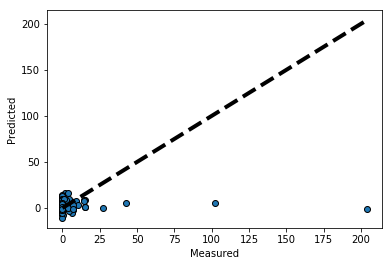

In [580]:
###############################################################################
revenues_CC_Test = regression_Credit_card.predict(X_reg_test)
fig, ax = plt.subplots()
ax.scatter(y_reg_test, revenues_CC_Test, edgecolors=(0, 0, 0))
ax.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [581]:
###############################################################################
print ("Final model optimal parameters:", regression_Credit_card.best_params_)
revenues_CC_predicted = regression_Credit_card.predict(prediction_classified_features)
prediction_classified_features['Predicted_CC_Revenue']=revenues_CC_predicted

Final model optimal parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [582]:
prediction_classified_features.head()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Predicted_CC_Revenue
Client,,,,,,,,,,,,,,,,,,,,,
850,0,49,44,1,6.0,79.0,2.0,2.0,5.0,43.523214,...,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0,2.935005
827,1,57,50,1,6.0,79.0,1.0,1.0,5.0,49.193571,...,1455.035714,607.142857,17.857143,843.250000,26.0,23.0,4.0,1.0,17.0,7.113194
739,1,69,55,1,1.0,8.0,1.0,2.0,1.0,5519.308929,...,282.575000,0.000000,211.182143,0.000000,7.0,5.0,0.0,3.0,0.0,4.567623
137,0,63,168,3,6.0,1.0,2.0,2.0,5.0,185.722143,...,503.980714,178.571429,255.909286,67.428571,11.0,11.0,1.0,6.0,3.0,1.297210
1160,1,19,260,1,6.0,79.0,1.0,2.0,1.0,2723.980357,...,925.625000,285.714286,190.814286,178.642857,28.0,26.0,3.0,9.0,7.0,2.125951


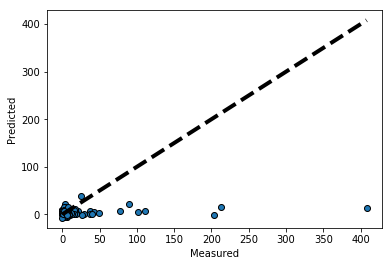

In [583]:
fig, ax = plt.subplots()
ax.scatter(prediction_classified_target, revenues_CC_predicted, edgecolors=(0, 0, 0))
ax.plot([prediction_classified_target.min(), prediction_classified_target.max()], [prediction_classified_target.min(), prediction_classified_target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [584]:
prediction_classified_features.to_csv('CC_Customers.csv')

In [585]:
pwd

'C:\\Users\\DiyaMol\\KBC-Group'